In [1]:
%reload_ext autoreload
%autoreload 2

## Influence of time on the ratings

In [2]:
from src.utils.data_utils import load_time_bias_data

time_df_reviews, time_df_beerAdvocate = load_time_bias_data('data')

[nltk_data] Downloading package punkt to /Users/romain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/romain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Analysis using time and rating per beer style
time_df_reviews_style = time_df_reviews.copy()
# take randomly 10 samples of style
time_df_reviews_style = time_df_reviews_style[time_df_reviews_style['style'].isin(time_df_reviews_style['style'].sample(10))]
time_df_reviews_style = time_df_reviews_style.groupby(['style', 'year', 'month'])['rating'].agg(['mean', 'count'])

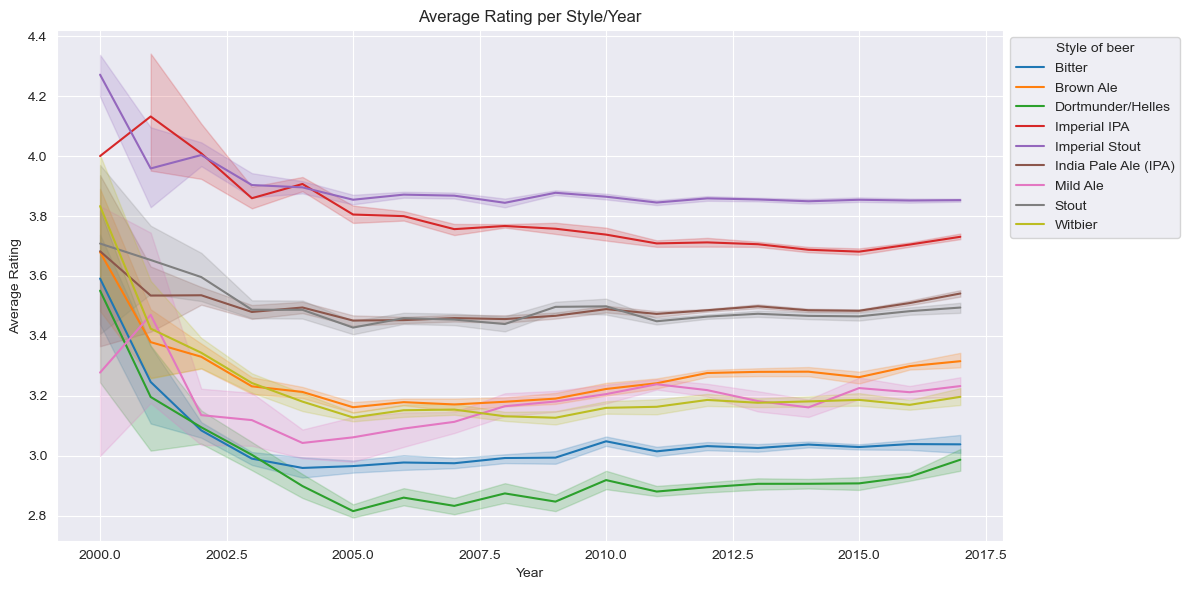

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the average rating per style and year
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df_reviews_style, x='year', y='mean', hue='style')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Style/Year')
plt.legend(title='Style of beer', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

In [5]:
import statsmodels.formula.api as smf

time_df_reviews_cat = time_df_reviews.copy()
# Compute the mean of all rating to see which column affect the rating around the mean
mean = time_df_reviews_cat['rating'].mean()
time_df_reviews_cat['binary_rating'] = (time_df_reviews_cat['rating'] >= mean).astype(int)

# Check which columns will impact the most the rating
log = smf.logit(formula='binary_rating ~ year + month + day', data=time_df_reviews_cat)
log = log.fit()
print(log.summary())

Optimization terminated successfully.
         Current function value: 0.668482
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          binary_rating   No. Observations:              6117679
Model:                          Logit   Df Residuals:                  6117675
Method:                           MLE   Df Model:                            3
Date:                Fri, 15 Nov 2024   Pseudo R-squ.:                0.008102
Time:                        02:50:38   Log-Likelihood:            -4.0896e+06
converged:                       True   LL-Null:                   -4.1230e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.0059      0.431   -255.329      0.000    -110.850    -109.162
year           0.0549      0.

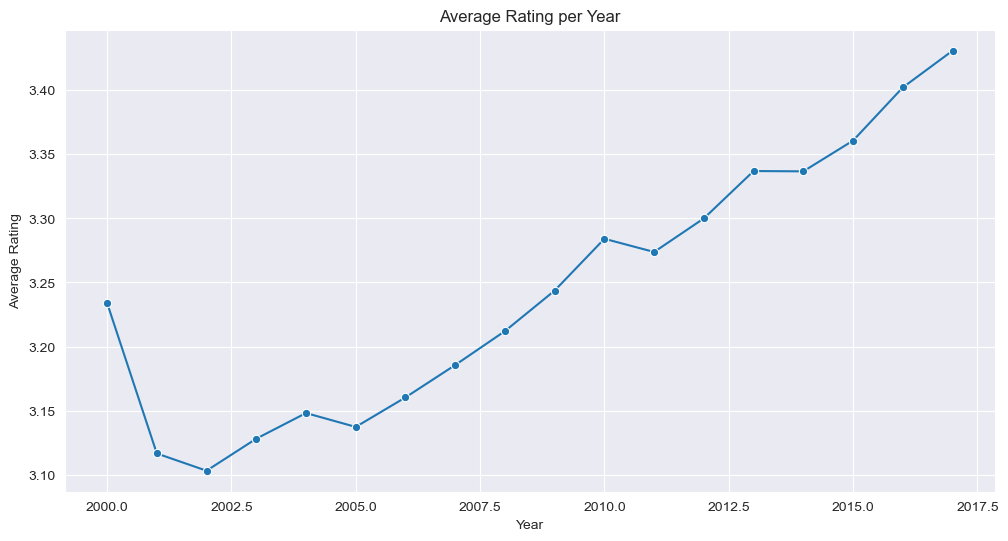

In [6]:
# Compare the average rating per year for all beer for the RateBeer dataset
mean = time_df_reviews.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

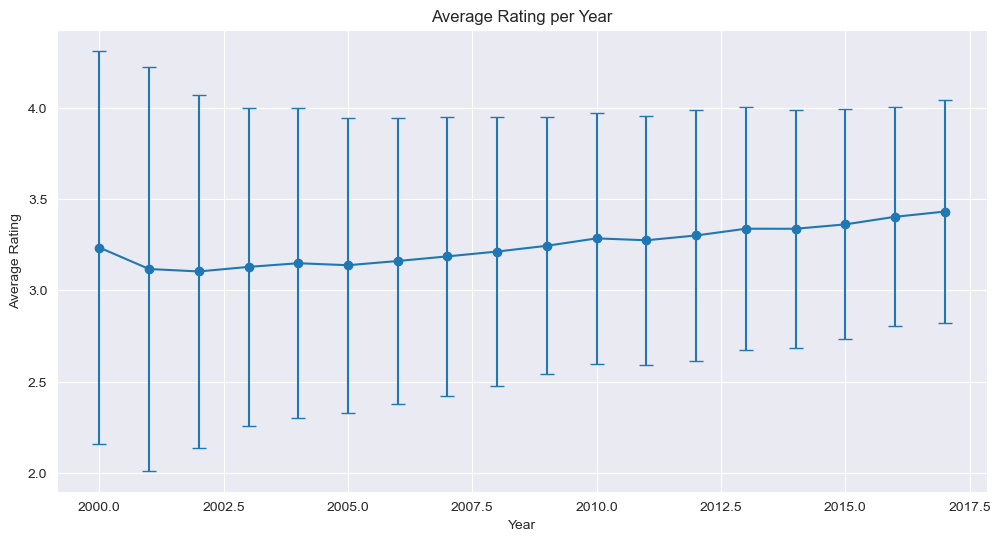

In [7]:
# Compare the average rating per year for all beer with std for the RateBeer dataset
mean = time_df_reviews.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_reviews.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

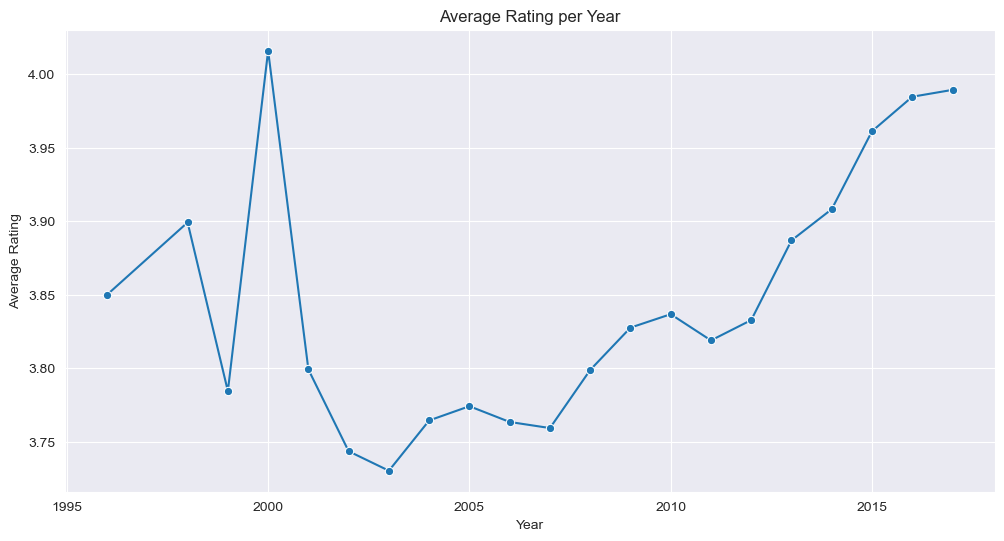

In [8]:
# Compare the average rating per year for all beer for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

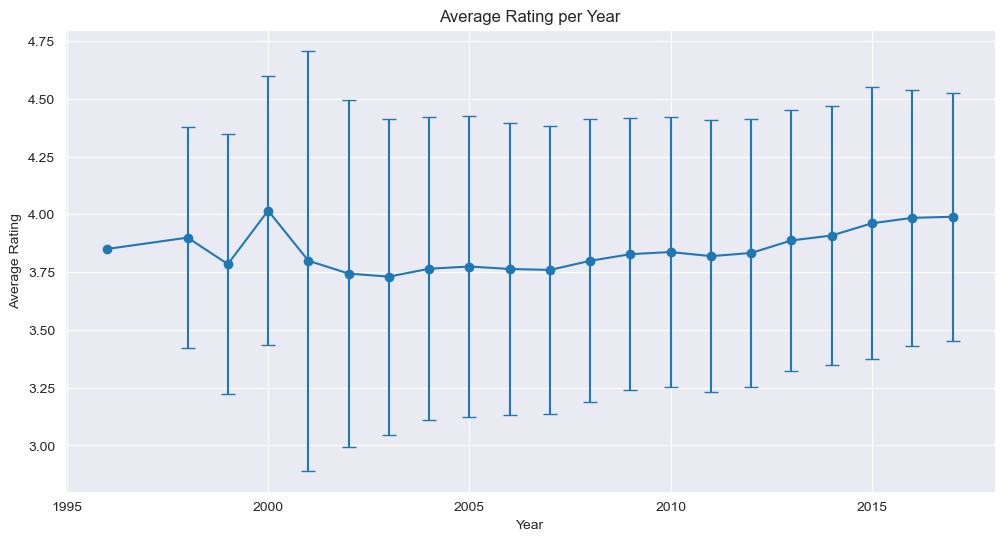

In [9]:
# Compare the average rating per year for all beer with std for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_beerAdvocate.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

## Impact of initial or recents ratings

In [10]:
from src.utils.data_utils import load_data_first_rating

# load the dataset
first_vs_other_rating = load_data_first_rating()
last_vs_other_rating = load_data_first_rating(first=False)

In [11]:
# check the correlation
corr_first = first_vs_other_rating['first_rating'].corr(first_vs_other_rating['other_rating'])
corr_last = last_vs_other_rating['first_rating'].corr(last_vs_other_rating['other_rating'])
print("Correlation between th first and the others rating :", corr_first)
print("Correlation between the last and the others rating :", corr_last)

Correlation between th first and the others rating : 0.6830005985679996
Correlation between the last and the others rating : 0.6372151201630049


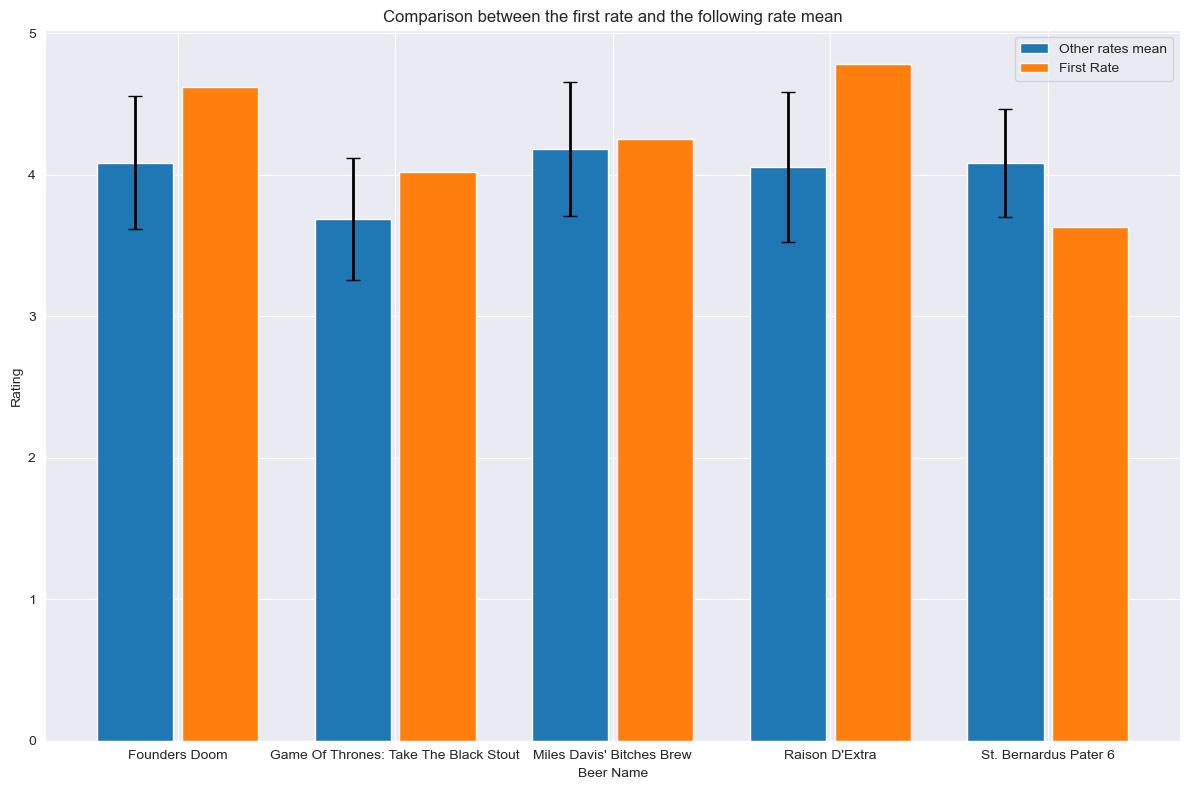

In [36]:
import numpy as np

# sample un subset to plot
hist_df = first_vs_other_rating.sample(5)

hist_labels = hist_df['beer_name']
hist_overall_means = hist_df['other_rating']
hist_first_means = hist_df['first_rating']
hist_std = hist_df['other_std']

width = 0.35
gap = 0.02
x = np.arange(len(hist_labels))

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x - width/2-gap, hist_overall_means, width, label='Other rates mean', yerr=hist_std, capsize=5, error_kw={'elinewidth': 2, 'ecolor': 'black'})
ax.bar(x + width/2+gap, hist_first_means, width, label='First Rate')

ax.set_xlabel('Beer Name')
ax.set_ylabel('Rating')
ax.set_title('Comparison between the first rate and the following rate mean')
ax.set_xticks(x)
ax.set_xticklabels(hist_labels, rotation=0, ha='center')
ax.legend()

plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import pearsonr, spearmanr

# perform statistical test to see if the variable are correlated

print(pearsonr(first_vs_other_rating['first_rating'], first_vs_other_rating['other_rating']))
print(spearmanr(first_vs_other_rating['first_rating'], first_vs_other_rating['other_rating']))

PearsonRResult(statistic=np.float64(0.683000598567999), pvalue=np.float64(1.662478409079184e-193))
SignificanceResult(statistic=np.float64(0.5941634172208455), pvalue=np.float64(9.632156923063058e-135))


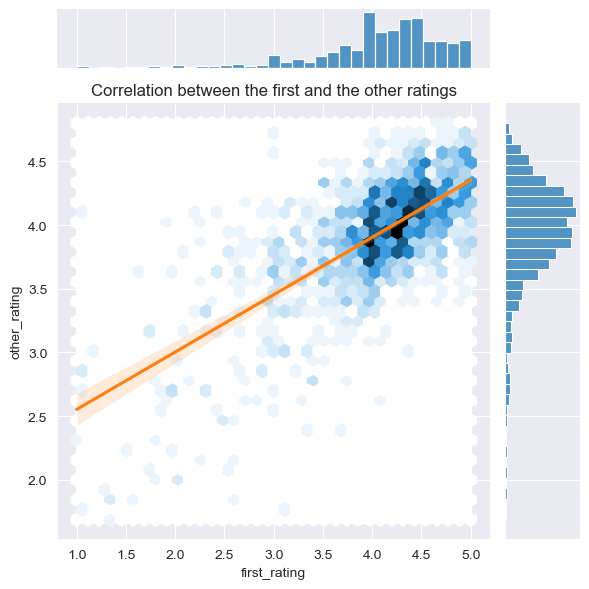

In [35]:
# On this join plot we see the correlation between first_rating and other_rating

sns.jointplot(x='first_rating', y='other_rating', data=first_vs_other_rating, kind='hex')
sns.regplot(x='first_rating', y='other_rating', data=first_vs_other_rating, scatter=False, color='#FF7F0E')
plt.title('Correlation between the first and the other ratings')

plt.tight_layout()
plt.show()

## Country biases investigation

In [15]:
from src.utils.data_utils import load_country_bias_data

df_ratings_locs = load_country_bias_data('data/BeerAdvocate/')
# Separate into users that rated beers from their country or US state and users that rated beers from somewhere else
df_domestic_rating = df_ratings_locs[df_ratings_locs.user_location == df_ratings_locs.beer_location]
df_international_rating = df_ratings_locs[df_ratings_locs.user_location != df_ratings_locs.beer_location]

# Drop users that are in both sets so we can suppose the two sets independent
overlap_users = set(df_domestic_rating.user_id).intersection(set(df_international_rating.user_id))
df_domestic_rating = df_domestic_rating[df_domestic_rating.user_id.isin(overlap_users)]
df_international_rating = df_international_rating[df_international_rating.user_id.isin(overlap_users)]

# Counts how many ratings a beer has and merge this count to each beer rating
df_domestic_counts = df_domestic_rating.groupby('beer_id')['beer_name'].count().rename('rating_count')
df_international_counts = df_international_rating.groupby('beer_id')['beer_name'].count().rename('rating_count')
df_domestic_rating = df_domestic_rating.merge(right=df_domestic_counts, on='beer_id', how='left')
df_international_rating = df_international_rating.merge(right=df_international_counts, on='beer_id', how='left')

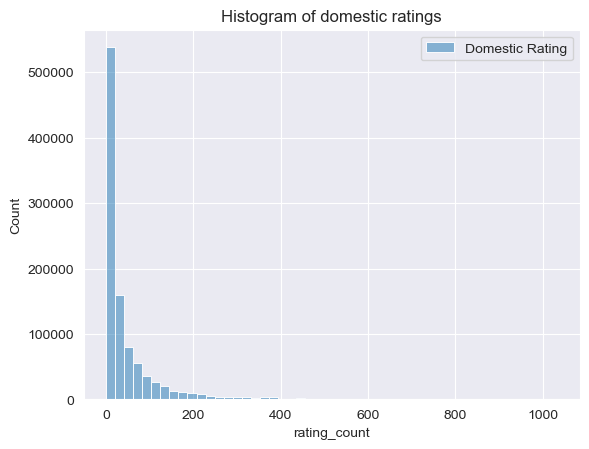

In [16]:
sns.histplot(df_domestic_rating.rating_count, bins=50, alpha=0.5, label='Domestic Rating')
plt.title('Histogram of domestic ratings')
plt.legend()

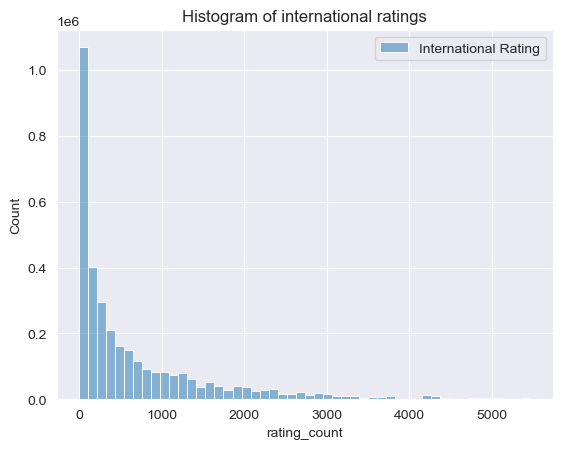

In [17]:
sns.histplot(df_international_rating.rating_count, bins=50, alpha=0.5, label='International Rating')
plt.title('Histogram of international ratings')
plt.legend()

In [18]:
# Find quantile for the rating count in both sets to have a threshold to remove beers with too few ratings
perc = 0.25
dom_thresh = df_domestic_rating.rating_count.quantile(perc)
inter_thresh = df_international_rating.rating_count.quantile(perc)
print(f'{100 * perc}% quantile of domestic ratings counts: {dom_thresh}')
print(f'{100 * perc}% quantile of international ratings counts: {inter_thresh}')
thresh = min(dom_thresh, inter_thresh)

# Remove beers that have less than 'thresh' ratings
df_dom_filtered = df_domestic_rating[df_domestic_rating.rating_count > thresh]
df_inter_filtered = df_international_rating[df_international_rating.rating_count > thresh]
print(f"Size of domestic ratings: {len(df_dom_filtered['beer_id'])}")
print(f"Size of international ratings: {len(df_inter_filtered['beer_id'])}")

25.0% quantile of domestic ratings counts: 5.0
25.0% quantile of international ratings counts: 69.0
Size of domestic ratings: 741535
Size of international ratings: 3200492


Mean rating for the domestic ratings: 3.9428210940818706
Mean rating for the international ratings: 3.8980626447433737
Standard deviation of rating for the domestic ratings: 0.5231940742341235
Standard deviation of rating for the international ratings: 0.5685775837665928


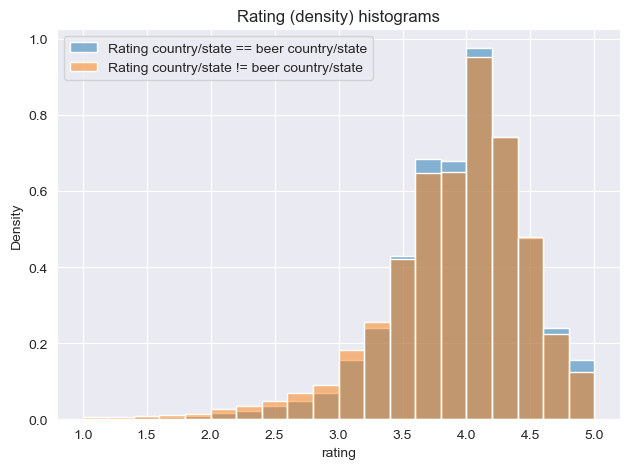

In [19]:
# Plot the densities histograms of the ratings for both domestic and international ratings
sns.histplot(df_dom_filtered['rating'], stat='density', bins=20, alpha=0.5,
             label='Rating country/state == beer country/state')
sns.histplot(df_inter_filtered['rating'], stat='density', bins=20, alpha=0.5,
             label='Rating country/state != beer country/state')
plt.title('Rating (density) histograms')
plt.tight_layout()
plt.legend()

print(f"Mean rating for the domestic ratings: {df_dom_filtered['rating'].mean()}")
print(f"Mean rating for the international ratings: {df_inter_filtered['rating'].mean()}")
print(f"Standard deviation of rating for the domestic ratings: {df_dom_filtered['rating'].std()}")
print(f"Standard deviation of rating for the international ratings: {df_inter_filtered['rating'].std()}")

In [20]:
from scipy.stats import ttest_ind

# The distributions are more or less normal, and we suppose they are independent so we can use the two samples t-test
# H0: There is no significant difference between domestic and international ratings
# H1: There is a significant difference between domestic and international ratings

p_value = ttest_ind(df_dom_filtered['rating'], df_inter_filtered['rating']).pvalue
print(f'P-value: {p_value}')

# If the p-value is smaller than significance level 5% we reject H0
if p_value < 0.05:
    print("There is a significant difference between domestic and international ratings")
else:
    print("There is no significant difference between domestic and international ratings")

P-value: 0.0
There is a significant difference between domestic and international ratings


In [21]:
from src.utils.data_utils import load_beer_consumption_dataframe

#load dataframe
merged_df = load_beer_consumption_dataframe()

In [22]:
# check the correlation between the beer consumption per capita and the average rating of beer in the country

corr = merged_df['rating'].corr(merged_df['beer_consumption_per_capita'])
print("Correlation:", corr)

Correlation: 0.1886702326433897


In [23]:
print(pearsonr(merged_df['rating'], merged_df['beer_consumption_per_capita']))
print(spearmanr(merged_df['rating'], merged_df['beer_consumption_per_capita']))

PearsonRResult(statistic=np.float64(0.1886702326433896), pvalue=np.float64(0.021648703784520766))
SignificanceResult(statistic=np.float64(0.19006132085108066), pvalue=np.float64(0.020682971553509392))


## Influence of Beer Names on Ratings

### Data Loading

In [24]:
from src.utils.data_utils import load_name_keyword_data

# Path to beers csv file
data_path = "data/BeerAdvocate/"
rated_beers = load_name_keyword_data(data_path)

### Evaluating the Importance of Specific Keywords in Beer Naming

In [25]:
import nltk
from src.utils.data_utils import convert_name_to_stemmed_keywords
nltk.download("punkt_tab")

# Add keywords column with stemmed keywords for each beer name
rated_beers["keywords"] = rated_beers["beer_name"].apply(convert_name_to_stemmed_keywords)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/romain/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [26]:
# Find the number, average, standard deviation, minimum and maximum beer ratings for each keyword
exploded_keywords = rated_beers.explode("keywords")
keyword_ratings = exploded_keywords.groupby("keywords")["avg"].agg(["mean", "count", "std", "min", "max"]).reset_index()

# Keep only keywords which are common and significant (>= 100 beers with keyword)
significant_keywords = keyword_ratings[keyword_ratings["count"] >= 100]

In [27]:
# Display 10 most positively significant keywords
ten_best = significant_keywords.nlargest(10, "mean")
ten_best

,keywords,mean,count,std,min,max
24475,w,4.150929,140,0.368165,2.19,4.84
3188,blend,4.144384,146,0.334802,2.62,4.86
430,2016,4.108108,148,0.317328,2.99,4.87
15491,mosaic,4.094598,174,0.259879,2.83,4.78
9268,galaxi,4.094586,133,0.242529,3.35,4.56
2643,bean,4.085391,128,0.334089,3.05,4.77
3677,brandi,4.076615,130,0.384104,2.51,4.80
20863,simco,4.073220,118,0.258344,3.15,4.67
12400,juic,4.072736,106,0.303602,3.36,4.83
1183,age,4.056598,1746,0.322567,2.17,4.90


In [28]:
# Display 10 most negatively significant keywords
ten_worst = significant_keywords.nsmallest(10, "mean")
ten_worst

,keywords,mean,count,std,min,max
13725,light,2.964534,311,0.696015,1.50,4.52
18197,premium,3.105729,288,0.464278,1.84,4.16
17701,pilsen,3.236937,111,0.432113,2.00,4.04
8108,export,3.338774,106,0.545017,2.11,4.40
14376,malt,3.373365,104,0.675532,1.49,4.87
13302,lager,3.405871,1390,0.450432,1.58,4.35
1462,amber,3.465235,596,0.330099,1.38,4.36
20051,saranac,3.508545,110,0.259424,2.80,4.41
16773,origin,3.518962,183,0.464663,2.09,4.51
3235,blond,3.523381,698,0.357753,2.03,4.82


In [29]:
# T-test to confirm significant differences between most polarizing keywords
with_keyword_1 = rated_beers[rated_beers["keywords"].apply(lambda x: "w" in x)]["avg"]
with_keyword_2 = rated_beers[rated_beers["keywords"].apply(lambda x: "light" in x)]["avg"]

In [30]:
t_stat, p_val = ttest_ind(with_keyword_1, with_keyword_2)
t_stat, p_val

(np.float64(18.952795915475715), np.float64(2.9659134161753203e-59))

In [31]:
# T-test to confirm less or no differences between similarly ranked keywords
with_keyword_1 = rated_beers[rated_beers["keywords"].apply(lambda x: "w" in x)]["avg"]
with_keyword_2 = rated_beers[rated_beers["keywords"].apply(lambda x: "blend" in x)]["avg"]

In [32]:
t_stat, p_val = ttest_ind(with_keyword_1, with_keyword_2)
t_stat, p_val

(np.float64(0.18638182347893084), np.float64(0.8522788779103688))

In [33]:
# T-test between beers with any of the top 10 rated keywords vs top 10 worst rated keywords
with_keyword_1 = rated_beers[rated_beers["keywords"].apply(lambda x: any(keyword in x for keyword in list(ten_best["keywords"])))]["avg"]
with_keyword_2 = rated_beers[rated_beers["keywords"].apply(lambda x: any(keyword in x for keyword in list(ten_worst["keywords"])))]["avg"]

In [34]:
t_stat, p_val = ttest_ind(with_keyword_1, with_keyword_2)
t_stat, p_val

(np.float64(63.9879409398508), np.float64(0.0))